In [1]:
from datasetcontroller.datacontroller import DataController
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from nnmodules.unet import Lstm2dUnet
from nnmodules.gan import DCGAN, DCGAN_v2
from glob import glob
import numpy as np

2023-05-30 15:54:05.197301: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-30 15:54:05.298113: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
# 데이터셋 폴더 경로 설정
path = os.path.join("/workspace")
data_path = os.path.join(path,'cmaqProjectdata')
# 컨트롤러
datacontroller = DataController(data_path = data_path)

train_tfr_path = glob(os.path.join(data_path,"dataset_record","train",'*.tfr'))
test_tfr_path = glob(os.path.join(data_path,"dataset_record","test",'*.tfr'))


/usr/local/lib/python3.8/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


67 82


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3460: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)
/workspace/repos/cmaqProject/experiment/datasetcontroller/datacontroller.py:55: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: +init=epsg:5179 +type=crs
Right CRS: EPSG:5179

  joined = gpd.sjoin(ctp_rvn_gpd, grid_data.to_crs(5179), op='contains')


In [3]:
input_width = 6
target_width = 1
window_size = input_width + target_width
shift = 1
batch_size = 5
epoch = 3
INPUT_SHAPE = [input_width, 64, 64, 61]
OUTPUT_CHANNELS = 1

train_ds, train_dataset = datacontroller.get_window_dataset(train_tfr_path, window_size, shift, batch_size)
test_ds, test_dataset = datacontroller.get_window_dataset(test_tfr_path, window_size, shift, batch_size)

2023-05-30 15:54:09.677396: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-30 15:54:11.587275: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22275 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:19:00.0, compute capability: 8.6
2023-05-30 15:54:11.587880: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 19043 MB memory:  -> device: 1, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:1a:00.0, compute capability: 8.6
2023-05-30 15:54:11.588370: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localho

## LSTM 기반 피팅

In [4]:
net = Lstm2dUnet()
optimizer = tf.keras.optimizers.Adam(0.0001)
net.compile(optimizer=optimizer, loss = net.lose_mse)

In [5]:
# verbose, train call back check
history = net.fit(
  train_ds,
  validation_data=test_ds,
  epochs=epoch,
)

Epoch 1/3


2023-05-30 11:59:07.426824: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inlstm2d_unet/upsample/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2023-05-30 11:59:18.019979: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 263 of 1000
2023-05-30 11:59:27.994783: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 532 of 1000
2023-05-30 11:59:38.015881: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 798 of 1000
2023-05-30 11:59:45.586271: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:417] Shuffle buffer filled.
2023-05-30 11:59:46.358312: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8101
2023-05-30 11:59:48.149311: I tensorflow/compiler/

   2927/Unknown - 240s 66ms/step - loss: 166.6270

2023-05-30 12:03:14.548877: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 266 of 1000
2023-05-30 12:03:24.547164: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 535 of 1000
2023-05-30 12:03:34.562568: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 803 of 1000
2023-05-30 12:03:41.884892: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:417] Shuffle buffer filled.


2927/2927 [==============================] - 307s 89ms/step - loss: 166.6270 - val_loss: 173.0239
Epoch 2/3
2927/2927 [==============================] - 230s 77ms/step - loss: 138.6367 - val_loss: 161.3413
Epoch 3/3
2927/2927 [==============================] - 230s 77ms/step - loss: 123.0123 - val_loss: 157.9473


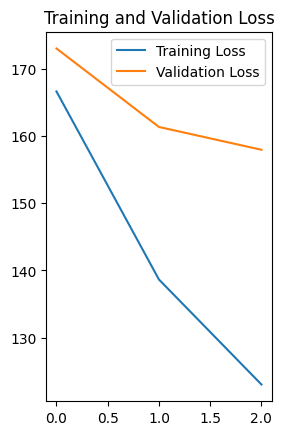

In [6]:
# 일단 val_set만 활용, 
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epoch)

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [8]:
predictions = net.predict(test_ds)
print(predictions.shape)

1166/1166 [==============================] - 34s 23ms/step
(5826, 64, 64, 1)


2023-05-30 12:14:47.919424: I tensorflow/core/grappler/optimizers/data/replicate_on_split.cc:32] Running replicate on split optimization


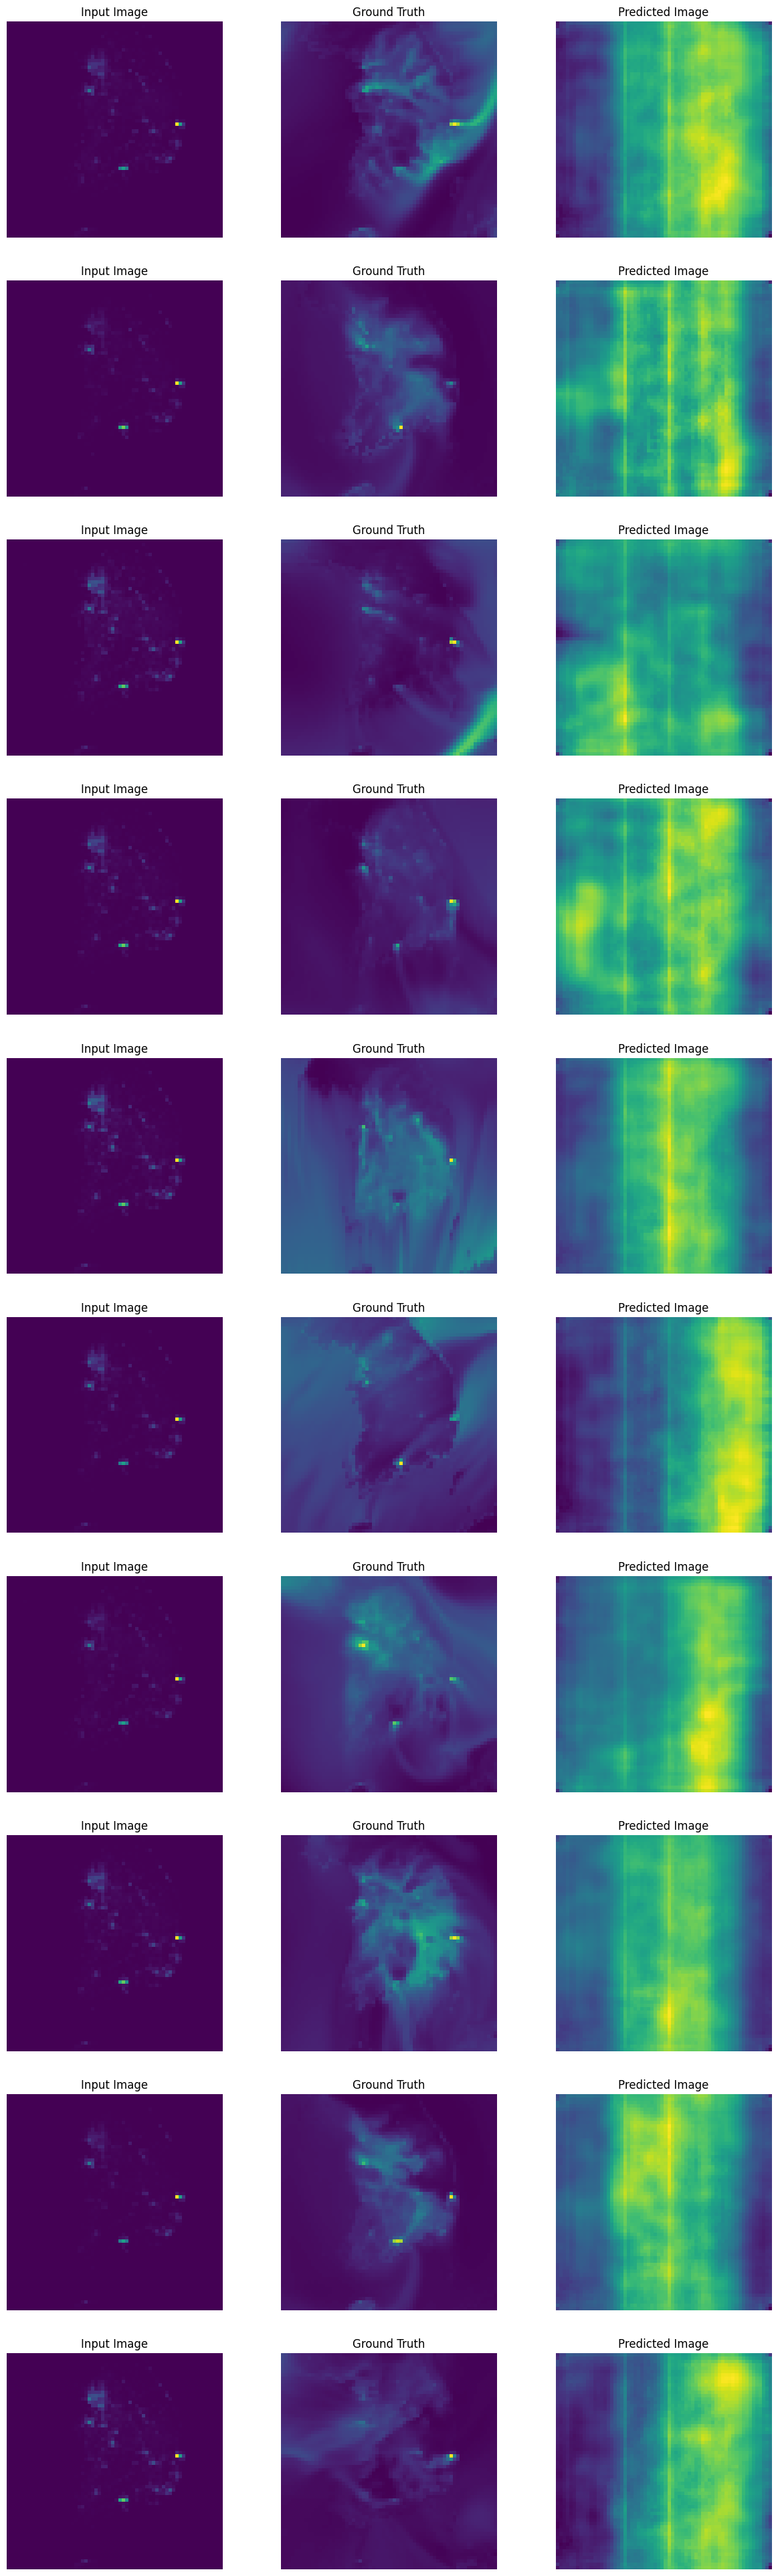

In [14]:
plt.figure(figsize=(15, 15*10))
j = 0
for step, (input_image, target) in test_ds.repeat().take(10).enumerate():
  prediction = net(input_image, training=True)
  
  display_list = [input_image[3][0][:,:,0][::-1], target[3][0,:,:,0][::-1], prediction[3][:,:,0][::-1]]
  title = ['Input Image', 'Ground Truth', 'Predicted Image']
  
  for i in range(3):
    plt.subplot(30, 3, j + i + 1)
    plt.title(title[i])
    # Getting the pixel values in the [0, 1] range to plot.
    plt.imshow(display_list[i])
    plt.axis('off')
  j += 3

## GAN기반

In [4]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

# 모델 체크포인트
proj_path = os.path.join(path,'repos','cmaqProject')
checkpoint_dir = os.path.join(proj_path,'models','training_checkpoints',"model_dcgan_hourly_1_checkpoint")
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")

dcgan = DCGAN_v2(lambda_c = 100, input_shape_cus=INPUT_SHAPE, output_channels=OUTPUT_CHANNELS)
dcgan.compile()


steps = 30000

checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 dcgan = dcgan,
                                 )

####### 불러오기 ##########
# manager = tf.train.CheckpointManager(checkpoint, checkpoint_dir, max_to_keep=3)
# checkpoint.restore(manager.latest_checkpoint)

KerasTensor(type_spec=TensorSpec(shape=(None, 64, 64, 1), dtype=tf.float32, name=None), name='conv_lstm2d_1/strided_slice_2:0', description="created by layer 'conv_lstm2d_1'")
KerasTensor(type_spec=TensorSpec(shape=(None, 64, 64, 1), dtype=tf.float32, name='target_image'), name='target_image', description="created by layer 'target_image'")
KerasTensor(type_spec=TensorSpec(shape=(None, 64, 64, 2), dtype=tf.float32, name=None), name='concatenate_4/concat:0', description="created by layer 'concatenate_4'")
KerasTensor(type_spec=TensorSpec(shape=(None, 14, 14, 1), dtype=tf.float32, name=None), name='conv2d_8/BiasAdd:0', description="created by layer 'conv2d_8'")


2023-05-30 15:54:20.144661: I tensorflow/core/grappler/optimizers/data/replicate_on_split.cc:32] Running replicate on split optimization
2023-05-30 15:54:28.144777: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8101


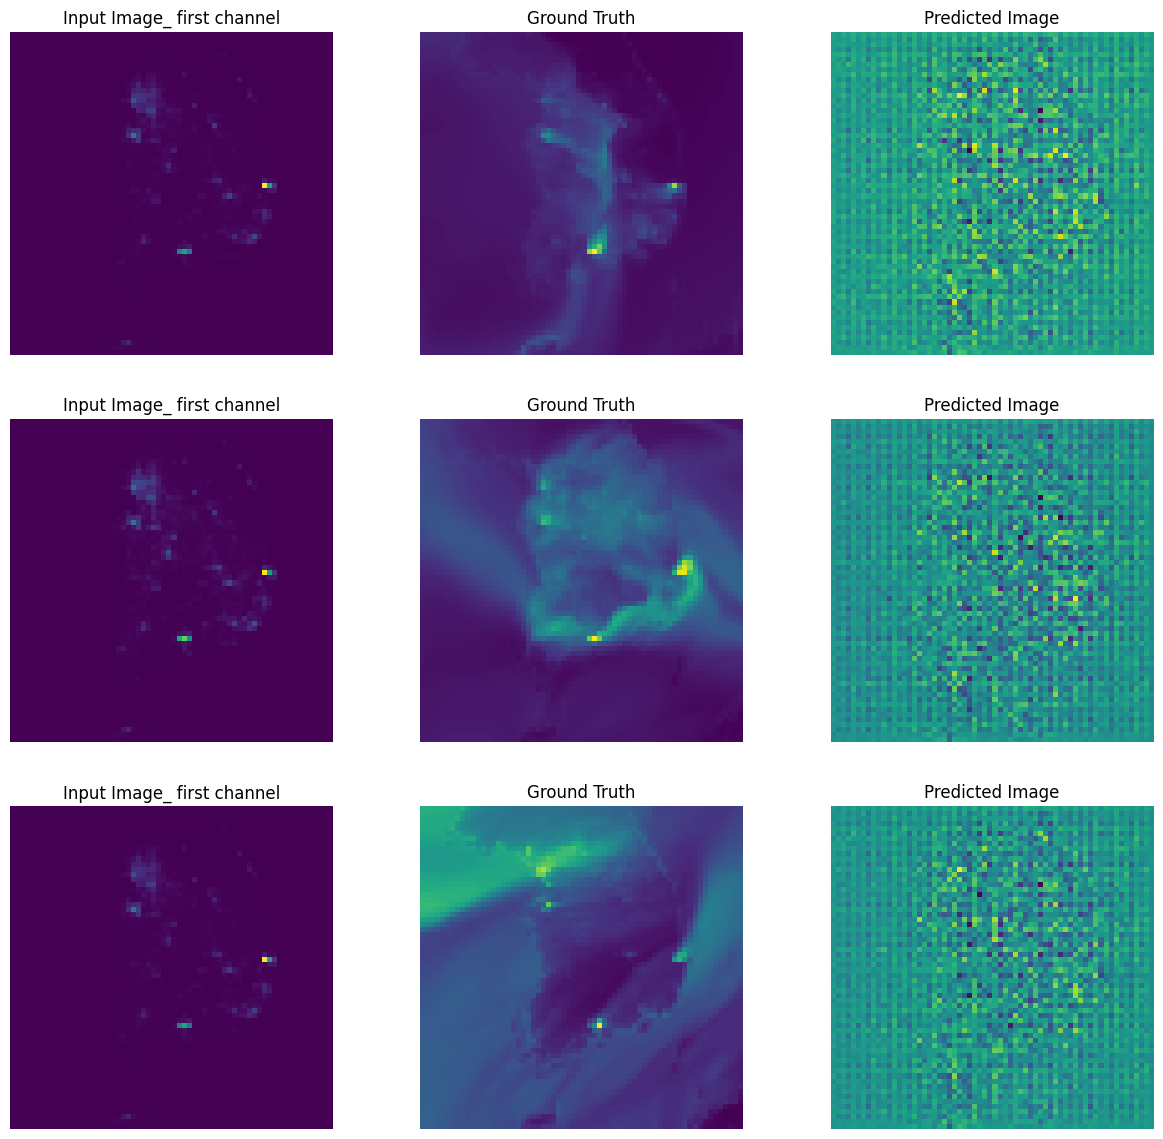

In [5]:
plt.figure(figsize=(15, 15*10))
j = 0
for step, (input_image, target) in test_ds.repeat().take(3).enumerate():
  prediction = dcgan(input_image, training=True)
  
  display_list = [input_image[3][0][:,:,0][::-1], target[3][0,:,:,0][::-1], prediction[3][:,:,0][::-1]]
  title = ['Input Image_ first channel', 'Ground Truth', 'Predicted Image']
  
  for i in range(3):
    plt.subplot(30, 3, j + i + 1)
    plt.title(title[i])
    # Getting the pixel values in the [0, 1] range to plot.
    plt.imshow(display_list[i])
    plt.axis('off')
  j += 3

In [6]:
@tf.function
def train_step(input_image, target, step):
  
  with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
    gen_output = dcgan.generator(input_image, training=True)
   
    disc_real_output = dcgan.discriminator([input_image, target])
    disc_generated_output = dcgan.discriminator([input_image, gen_output])
   
    gen_total_loss = dcgan.generator_loss(disc_generated_output, gen_output, target)
    disc_loss = dcgan.discriminator_loss(disc_real_output, disc_generated_output)
   
  generator_gradients = gen_tape.gradient(gen_total_loss,
                                          dcgan.generator.trainable_variables)
  discriminator_gradients = disc_tape.gradient(disc_loss,
                                               dcgan.discriminator.trainable_variables)

  generator_optimizer.apply_gradients(zip(generator_gradients,
                                          dcgan.generator.trainable_variables))
  discriminator_optimizer.apply_gradients(zip(discriminator_gradients,
                                              dcgan.discriminator.trainable_variables))

#   with summary_writer.as_default():
#     tf.summary.scalar('gen_total_loss', gen_total_loss, step=step)
#     tf.summary.scalar('gen_gan_loss', gen_gan_loss, step=step)
#     tf.summary.scalar('gen_l1_loss', gen_l1_loss, step=step)
#     tf.summary.scalar('disc_loss', disc_loss, step=step)
dcgan.train(train_ds, train_step, steps, checkpoint, checkpoint_prefix)

2023-05-30 15:54:31.077970: I tensorflow/core/grappler/optimizers/data/replicate_on_split.cc:32] Running replicate on split optimization


Step: 0


2023-05-30 15:54:45.169895: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/sequential_5/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2023-05-30 15:54:46.748228: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x3ee1b230 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-05-30 15:54:46.748256: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2023-05-30 15:54:46.748260: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (1): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2023-05-30 15:54:46.748263: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (2): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2023-05-30 15:54:46.748266: I tensorflow/compiler/xla/service/service.cc

..Time taken for 200 steps: 33.53 sec

Step: 200
..Time taken for 200 steps: 47.92 sec

Step: 400
..Time taken for 200 steps: 62.42 sec

Step: 600
..Time taken for 200 steps: 76.91 sec

Step: 800
..Time taken for 200 steps: 92.80 sec

Step: 1000
..Time taken for 200 steps: 107.23 sec

Step: 1200
..Time taken for 200 steps: 121.58 sec

Step: 1400
..Time taken for 200 steps: 136.31 sec

Step: 1600
..Time taken for 200 steps: 150.48 sec

Step: 1800
.

2023-05-30 15:57:16.642796: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/sequential_5/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


.Time taken for 200 steps: 170.35 sec

Step: 2000
..Time taken for 200 steps: 184.87 sec

Step: 2200
..Time taken for 200 steps: 199.20 sec

Step: 2400
..Time taken for 200 steps: 213.87 sec

Step: 2600
..Time taken for 200 steps: 227.96 sec

Step: 2800
..Time taken for 200 steps: 242.61 sec

Step: 3000
..Time taken for 200 steps: 257.02 sec

Step: 3200
..Time taken for 200 steps: 271.15 sec

Step: 3400
..Time taken for 200 steps: 285.44 sec

Step: 3600
..Time taken for 200 steps: 299.65 sec

Step: 3800
..Time taken for 200 steps: 314.37 sec

Step: 4000
..Time taken for 200 steps: 328.79 sec

Step: 4200
..Time taken for 200 steps: 342.83 sec

Step: 4400
..Time taken for 200 steps: 357.11 sec

Step: 4600
..Time taken for 200 steps: 371.46 sec

Step: 4800
..Time taken for 200 steps: 386.43 sec

Step: 5000
..Time taken for 200 steps: 400.74 sec

Step: 5200
..Time taken for 200 steps: 415.02 sec

Step: 5400
..Time taken for 200 steps: 429.37 sec

Step: 5600
..Time taken for 200 steps: 443.

2023-05-30 15:33:45.723803: I tensorflow/core/grappler/optimizers/data/replicate_on_split.cc:32] Running replicate on split optimization


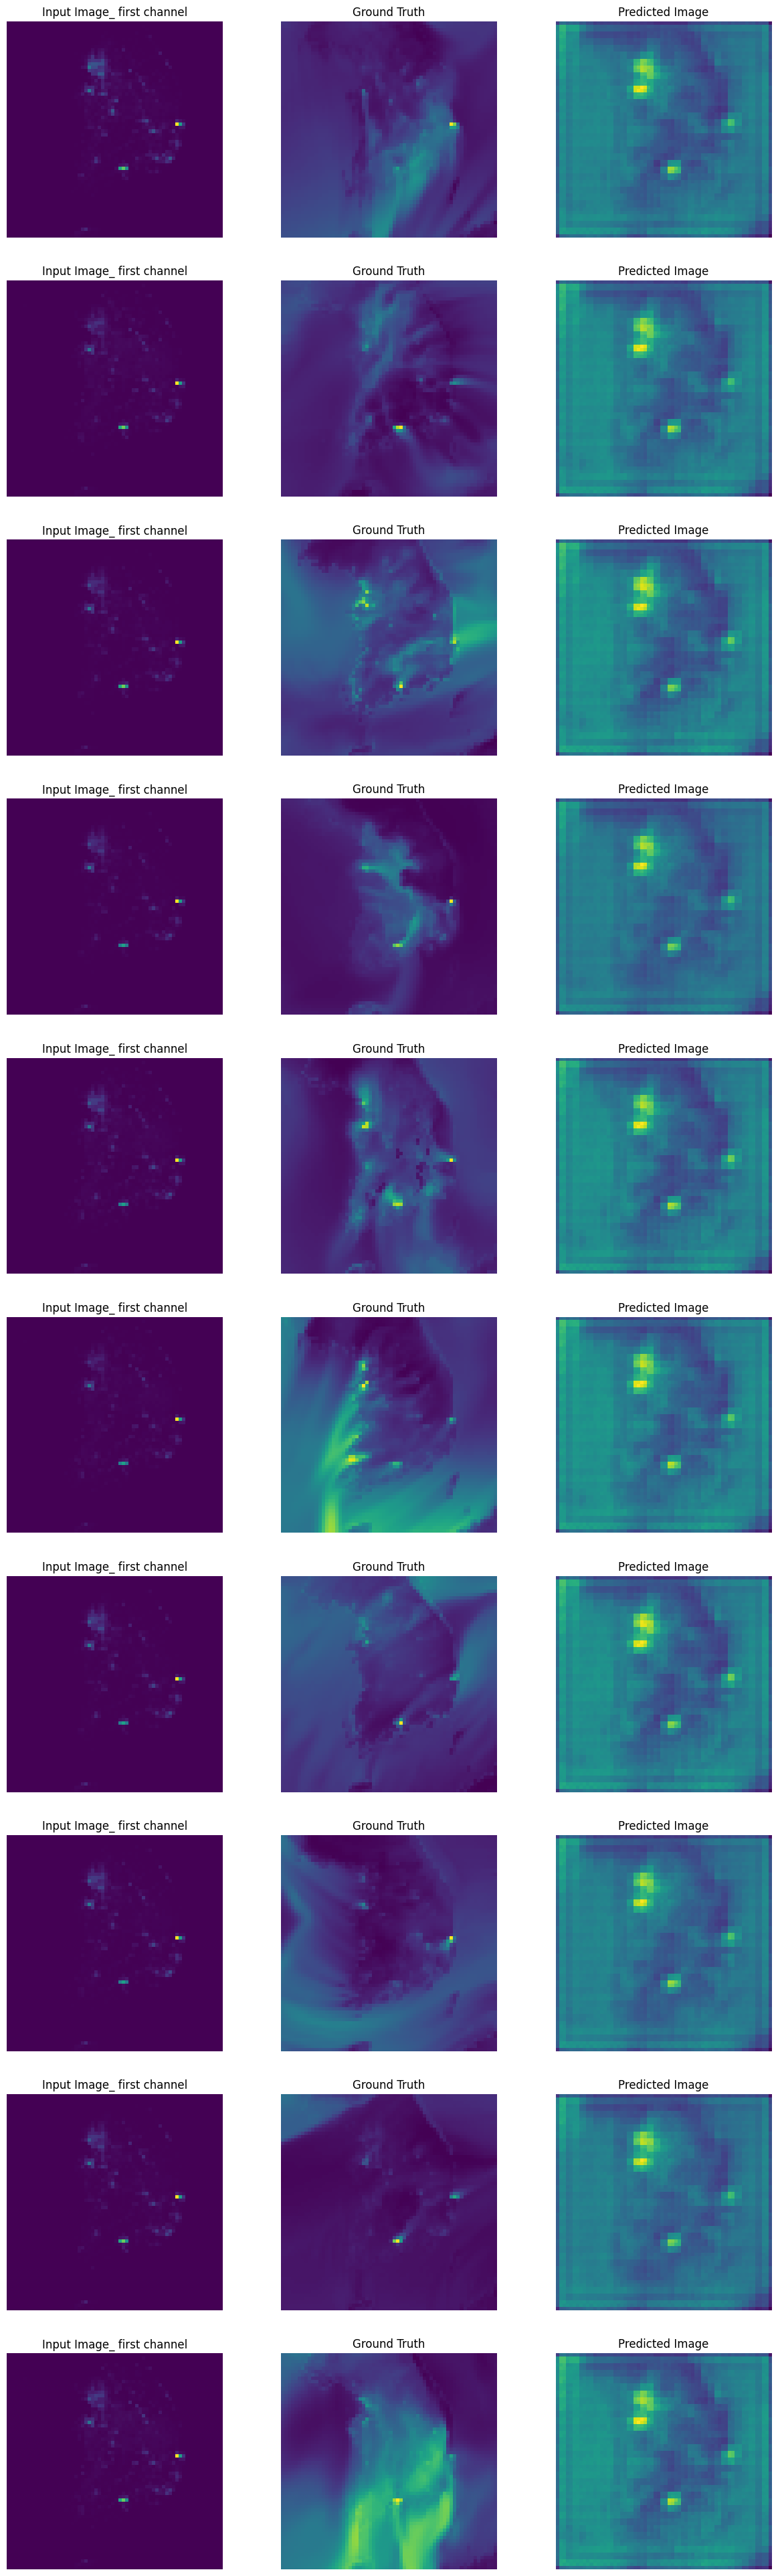

In [ ]:
plt.figure(figsize=(15, 15*10))
j = 0
for step, (input_image, target) in test_ds.repeat().take(10).enumerate():
  prediction = dcgan(input_image, training=True)
  
  display_list = [input_image[3][0][:,:,0][::-1], target[3][0,:,:,0][::-1], prediction[3][:,:,0][::-1]]
  title = ['Input Image_ first channel', 'Ground Truth', 'Predicted Image']
  
  for i in range(3):
    plt.subplot(30, 3, j + i + 1)
    plt.title(title[i])
    # Getting the pixel values in the [0, 1] range to plot.
    plt.imshow(display_list[i])
    plt.axis('off')
  j += 3